In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:

df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.shape

(607, 11)

In [5]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [6]:
df.duplicated().sum()

42

In [7]:
df.drop_duplicates(inplace=True)


In [8]:
df['experience_level'].value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

In [9]:
df['experience_level'] = df['experience_level'].map({
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive'
})

In [10]:
df['employment_type'].value_counts()

FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [11]:
df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

In [12]:
df['company_size'].value_counts()

M    290
L    193
S     82
Name: company_size, dtype: int64

In [13]:
df['company_size'] = df['company_size'].map({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

In [14]:
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [15]:
df['work_year'].value_counts()

2022    278
2021    215
2020     72
Name: work_year, dtype: int64

In [16]:
df['remote_ratio'].value_counts()

100    346
0      121
50      98
Name: remote_ratio, dtype: int64

In [17]:
df.rename(columns={'remote_ratio': 'job_type'}, inplace=True)
df['job_type'] = df['job_type'].map({
    100: 'remote',
    0: 'onsite',
    50: 'hybrid',
})

In [18]:
df['job_type'].value_counts()

remote    346
onsite    121
hybrid     98
Name: job_type, dtype: int64

In [19]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'job_type', 'company_location',
       'company_size'],
      dtype='object')

In [20]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,79833,DE,onsite,DE,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,onsite,JP,Small
2,2020,Senior,Full-time,Big Data Engineer,109024,GB,hybrid,GB,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,HN,onsite,HN,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,US,hybrid,US,Large


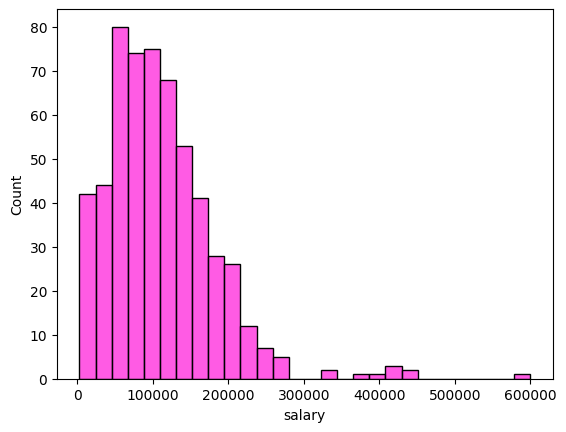

In [53]:
sns.set_palette('spring')
ax = sns.histplot(df['salary'])

In [22]:
# mean salary of employees with different experience levels
mean_of_ex = df.groupby('experience_level')['salary'].mean().sort_values()
mean_of_ex

experience_level
Entry         61643.318182
Mid           87792.995192
Senior       138374.880658
Executive    199392.038462
Name: salary, dtype: float64

Text(0.5, 1.0, 'Experience Level VS Salary')

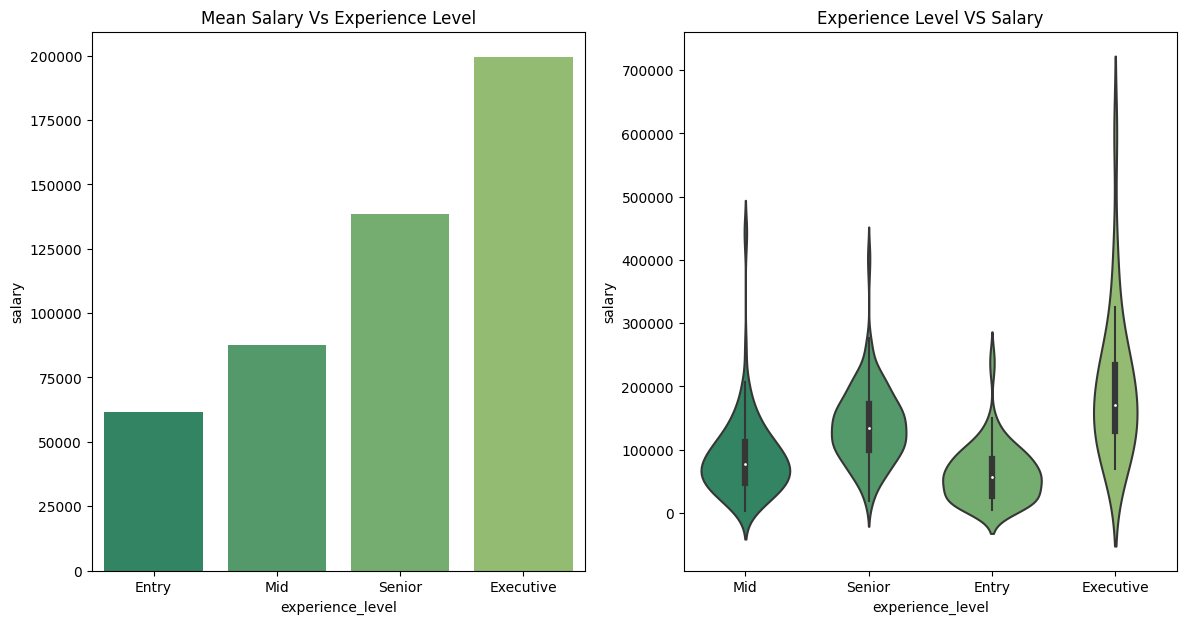

In [23]:
plt.figure(figsize=(14, 7))
sns.set_palette('summer')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_of_ex.index, y=mean_of_ex)
ax.set_title('Mean Salary Vs Experience Level')

plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='experience_level', y='salary')
ax.set_title('Experience Level VS Salary')

In [24]:
mean_of_emp = df.groupby('employment_type')['salary'].mean().sort_values()
mean_of_emp

employment_type
Part-time     33070.500000
Freelance     48000.000000
Full-time    111811.838828
Contract     184575.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Employment Type VS Salary')

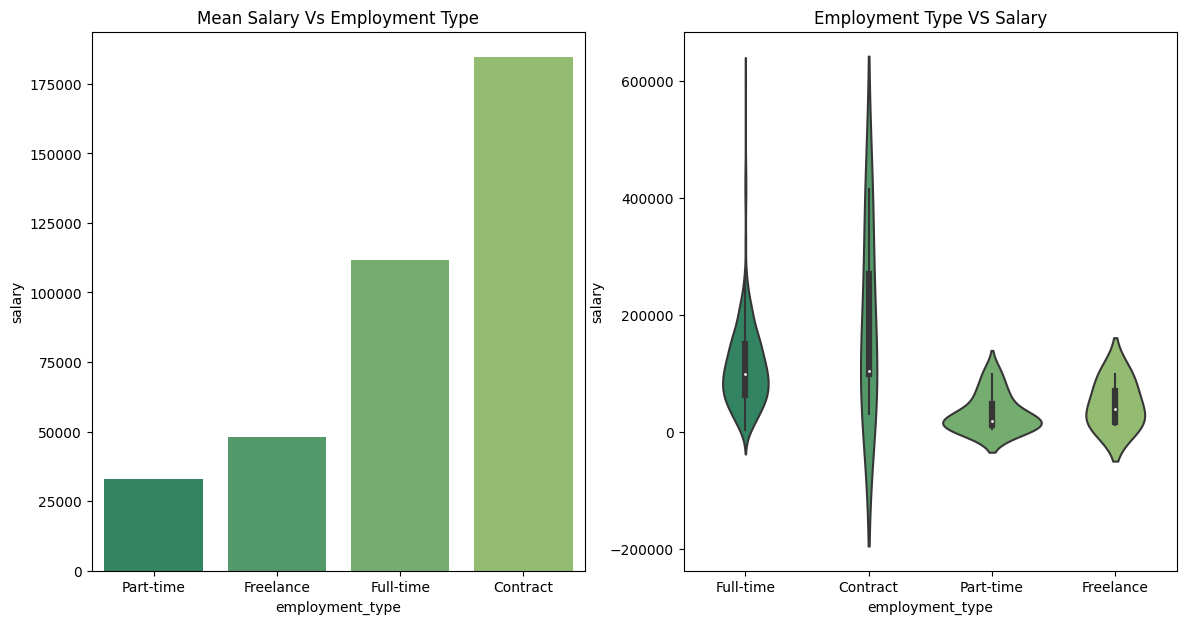

In [25]:
plt.figure(figsize=(14, 7))
sns.set_palette('summer')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_of_emp.index, y=mean_of_emp)
ax.set_title('Mean Salary Vs Employment Type')

plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='employment_type', y='salary')
ax.set_title('Employment Type VS Salary')

In [26]:
mean_of_comp = df.groupby('company_size')['salary'].mean().sort_values()
mean_of_comp

company_size
Small      77872.097561
Medium    114807.079310
Large     118213.880829
Name: salary, dtype: float64

Text(0.5, 1.0, 'Company Size VS Salary')

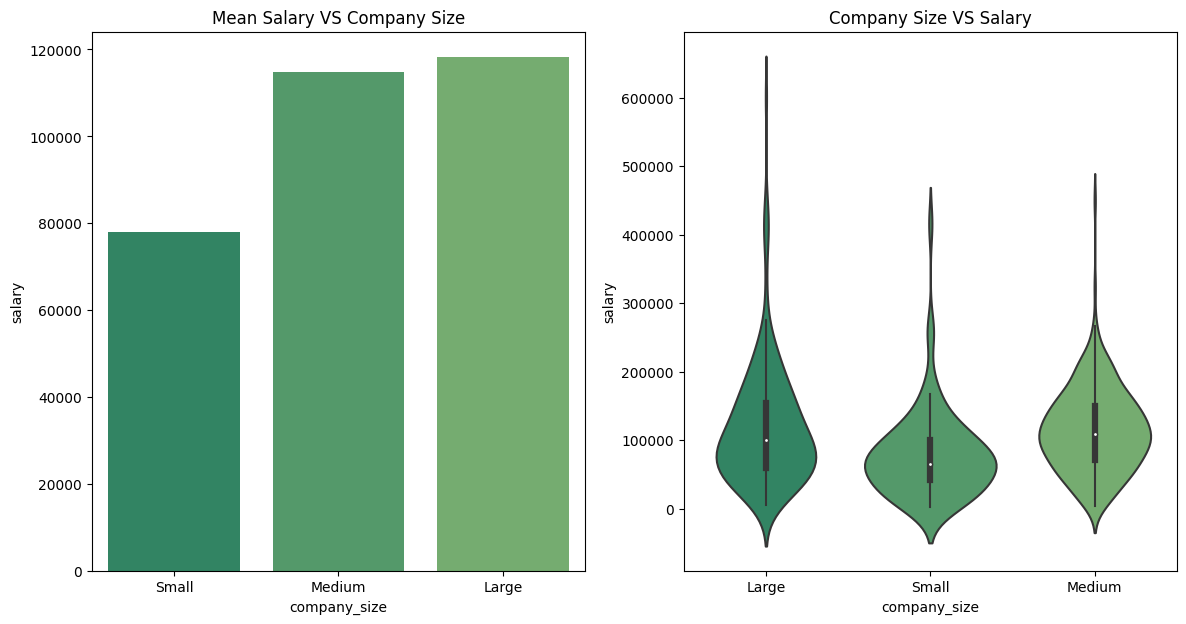

In [27]:
plt.figure(figsize=(14, 7))
sns.set_palette('summer')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_of_comp.index, y=mean_of_comp)
ax.set_title('Mean Salary VS Company Size')

plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='company_size', y='salary')
ax.set_title('Company Size VS Salary')

In [28]:
mean_job_type = df.groupby('job_type')['salary'].mean().sort_values()
mean_job_type

job_type
hybrid     80721.897959
onsite    105785.404959
remote    120763.190751
Name: salary, dtype: float64

Text(0.5, 1.0, 'Job Type VS Salary')

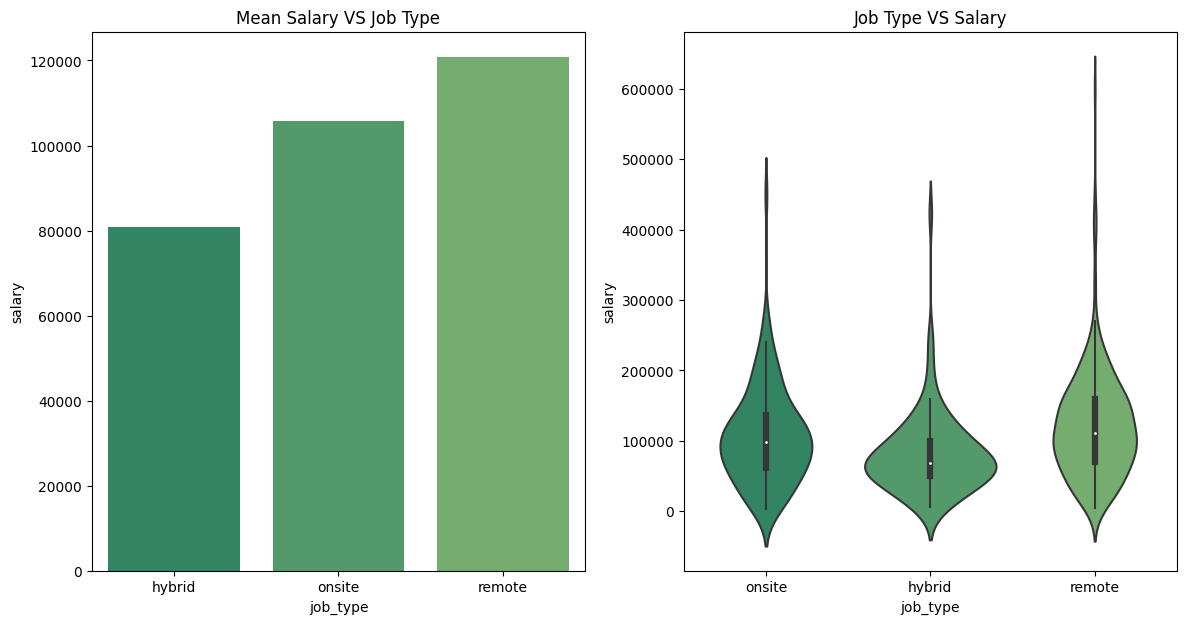

In [29]:
plt.figure(figsize=(14, 7))
sns.set_palette('summer')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_job_type.index, y=mean_job_type)
ax.set_title('Mean Salary VS Job Type')

plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='job_type', y='salary')
ax.set_title('Job Type VS Salary')

### Job Types and Experience Level distributions (Pie)

Text(0, 0.5, '')

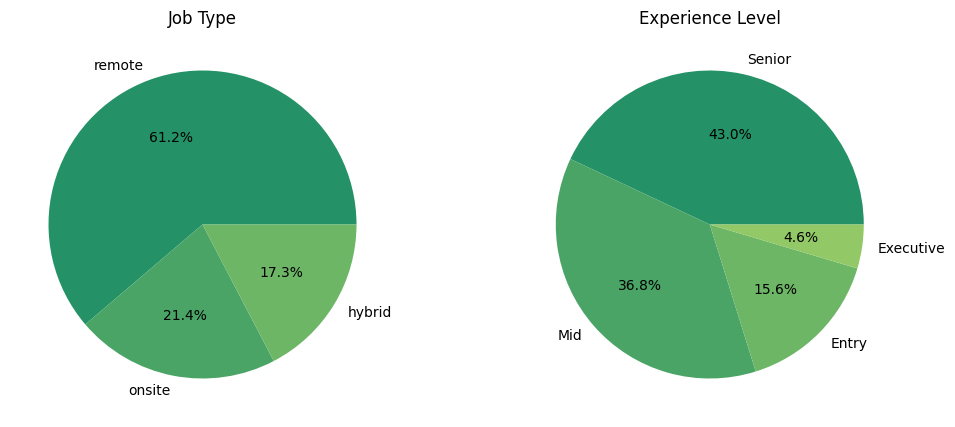

In [51]:
plt.figure(figsize=(12, 5))
sns.set_palette('summer')

plt.subplot(1,2,1)
ax = df['job_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Job Type')
ax.set_ylabel('')


plt.subplot(1,2,2)
ax = df['experience_level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Experience Level')
ax.set_ylabel('')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
c

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV


In [32]:
df_train = pd.read_csv('ds_salaries.csv')


In [33]:
df_train.drop(columns={'Unnamed: 0', 'salary_in_usd'}, axis=1, inplace=True)
df_train

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,US,100,US,M


In [34]:
df_train.duplicated().sum()

42

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
nums = df_train.select_dtypes(exclude="object").columns
nums


Index(['work_year', 'salary', 'remote_ratio'], dtype='object')

In [37]:
objs = df_train.select_dtypes(include="object").columns
objs

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [38]:
df_train = pd.get_dummies(df_train,columns=objs,drop_first=True)

In [39]:
X, y = df_train.drop("salary",axis=1) , df_train["salary"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
X_train

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Scientist,job_title_Analytics Engineer,...,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
134,2021,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
391,2022,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
587,2022,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
283,2021,100,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
186,2021,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2021,100,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,2020,50,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
359,2022,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
192,2021,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
nums= nums.drop("salary")
scalar = StandardScaler()
scalar.fit(X_train[nums])

StandardScaler()

In [42]:
X_train[nums] = scalar.transform(X_train[nums])
X_test[nums] = scalar.transform(X_test[nums])

In [43]:
models = {
    "Lasso ":LassoCV(),
    "Ridge":RidgeCV(),
    "ElasticNet":ElasticNetCV()
}

In [44]:
Results = {
    "Model":[],
    "Train Score":[],
    "Test Score":[],
    "RMSE":[]
}

In [45]:
for name, model in models.items():
    model.fit(X_train,np.log(y_train))
    train_s = model.score(X_train,np.log(y_train))
    test_s = model.score(X_test,np.log(y_test))
    y_pred = model.predict(X_test)
    RMSE = mean_squared_error((y_pred),np.log(y_test))
    Results["Model"].append(name)
    Results["Train Score"].append(train_s)
    Results["Test Score"].append(test_s)
    Results["RMSE"].append(RMSE)

In [46]:
scores = pd.DataFrame(Results)
scores

,Model,Train Score,Test Score,RMSE
0,Lasso,0.838755,0.770063,0.216569
1,Ridge,0.887938,0.773795,0.213054
2,ElasticNet,0.865259,0.766485,0.219939


Text(0.5, 1.0, 'Train Score')

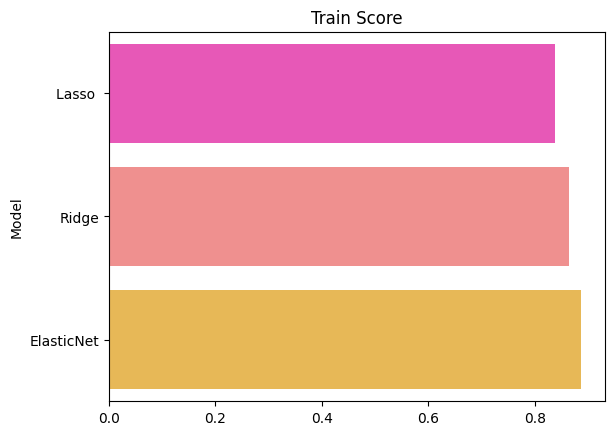

In [47]:
sns.barplot(y=scores['Model'], x=sorted(scores['Train Score']),palette="spring")
plt.title("Train Score")

Text(0.5, 1.0, 'Test Score')

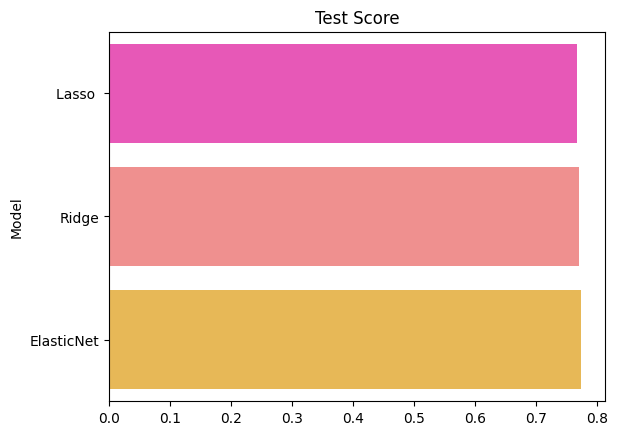

In [48]:
sns.barplot(y=scores['Model'], x=sorted(scores['Test Score']),palette="spring")
plt.title("Test Score")

Text(0.5, 1.0, 'RMSE')

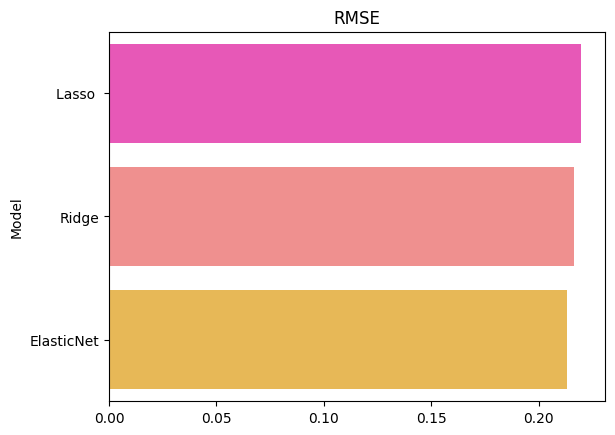

In [49]:
sns.barplot(y=scores['Model'], x=sorted(scores['RMSE'],reverse=True),palette="spring")
plt.title("RMSE")